In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  #QQ Plot - Wheather data is normal Distributed or not

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [5]:
df = pd.read_csv('concrete_data.csv')

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.shape

(1030, 9)

In [ ]:
df.describe()#Check the value is negative or 0 

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
#Regression without any transformation

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [20]:
r2_score(y_pred,y_test)

0.42317047978909705

In [ ]:
#Cross checking with 10 times data apply        
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

np.float64(0.4609940491662864)

In [ ]:
#Plotting the distplot without any transformation

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(col)
    
    plt.show()

In [26]:
#Applying box cox transformation

pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train+0.0000001)
x_test_transformed = pt.fit_transform(x_test+0.0000001)

pd.DataFrame({'cols':x_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.023556
2,Fly Ash,-0.005774
3,Water,0.959062
4,Superplasticizer,0.091027
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [36]:
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

In [29]:
#Regression without any transformation

lr = LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred = lr.predict(x_test_transformed)
r2_score(y_pred,y_test)

0.7735551405111636

In [32]:
lr = LinearRegression()
x_transformed = pt.fit_transform(x+0.0000001)

np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

np.float64(0.6658537935430977)

In [ ]:
#Plotting the distplot without any transformation

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(f"Before tranformation {col}")
    
    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title(f"After tranformation {col}")
    
    plt.show()

In [43]:
#Yeo Johnson Transformation

pt1 = PowerTransformer()
x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.fit_transform(x_test)

In [44]:
lr = LinearRegression()
lr.fit(x_train_transformed2,y_train)
y_pred_transformed2 = lr.predict(x_test_transformed2)
r2_score(y_pred=y_pred_transformed2,y_true=y_test)
 

0.8153845514638945

In [45]:
pd.DataFrame({'cols':x_train.columns,'Yeo_johnson_lambdas':pt1.lambdas_})
x_train_transformed2

array([[-1.2797506 ,  1.0181684 ,  1.13099335, ..., -0.26250397,
        -0.67756699,  0.10577763],
       [ 1.2448127 ,  0.22258409,  1.16667068, ..., -1.91271708,
        -0.3140633 ,  0.10577763],
       [ 0.07975145, -1.05692806,  1.14363683, ...,  1.01840694,
         0.02595441, -1.664976  ],
       ...,
       [-0.84466055, -1.05692806,  1.15215184, ...,  1.34537013,
         0.29715299,  1.25751143],
       [ 1.56574084,  0.92179625, -0.88493182, ..., -1.53724924,
         0.07620785,  0.10577763],
       [ 0.42653433, -1.05692806,  1.12367271, ..., -0.62083672,
         0.09510487,  0.10577763]], shape=(824, 8))

In [46]:
x_train_transformed2 = pd.DataFrame(x_train_transformed2,columns=x_train.columns)

In [47]:
x_train_transformed2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009268,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976
...,...,...,...,...,...,...,...,...
819,0.183530,1.146737,-0.884932,-1.769937,0.924953,0.390560,0.358772,-1.664976
820,-0.198870,-1.056928,1.151932,-1.839142,0.999192,1.445978,0.322793,-0.491262
821,-0.844661,-1.056928,1.152152,-0.706091,0.796163,1.345370,0.297153,1.257511
822,1.565741,0.921796,-0.884932,-0.019305,0.689050,-1.537249,0.076208,0.105778


C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


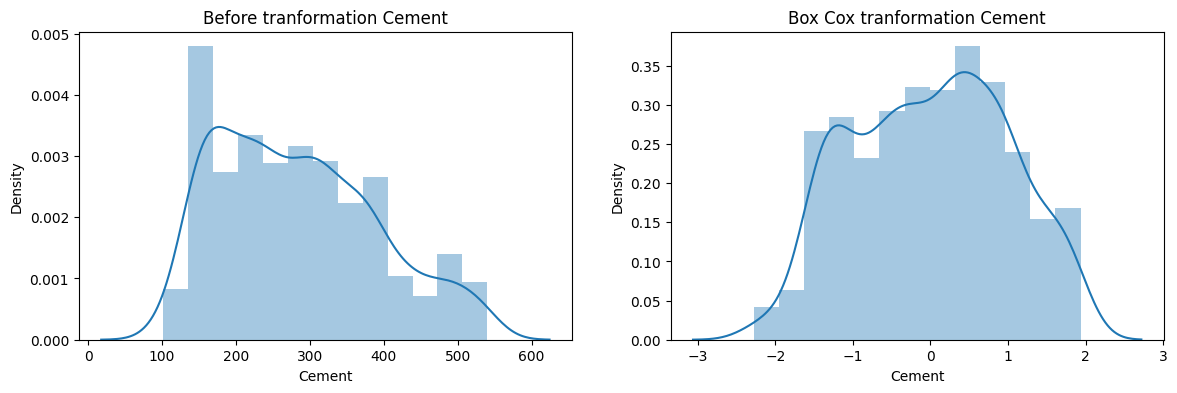

C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


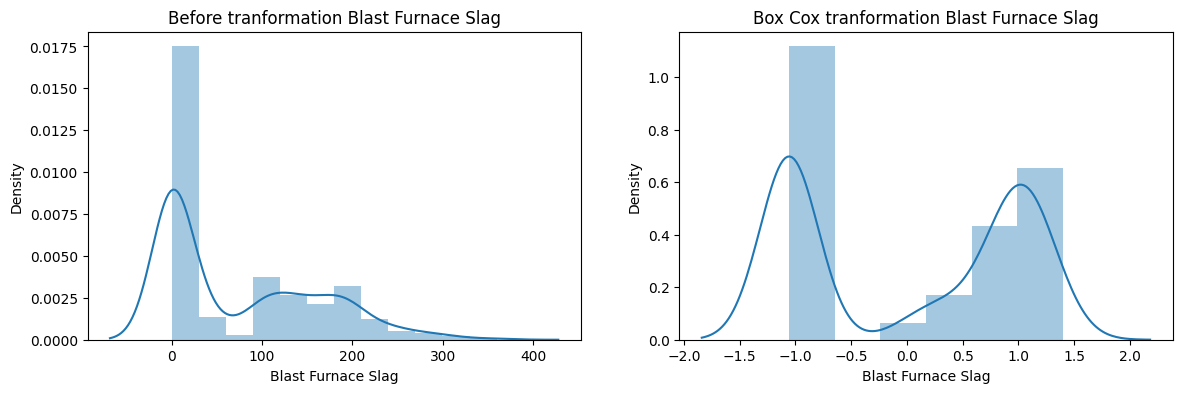

C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


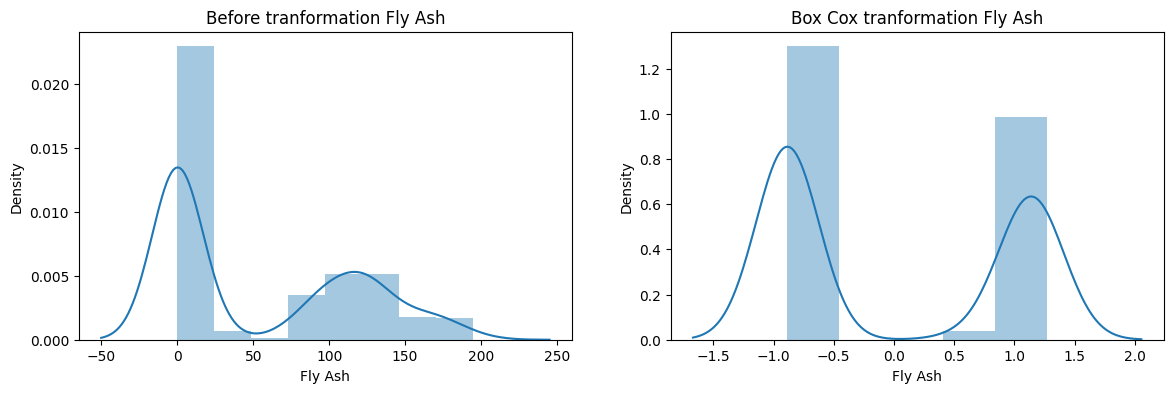

C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


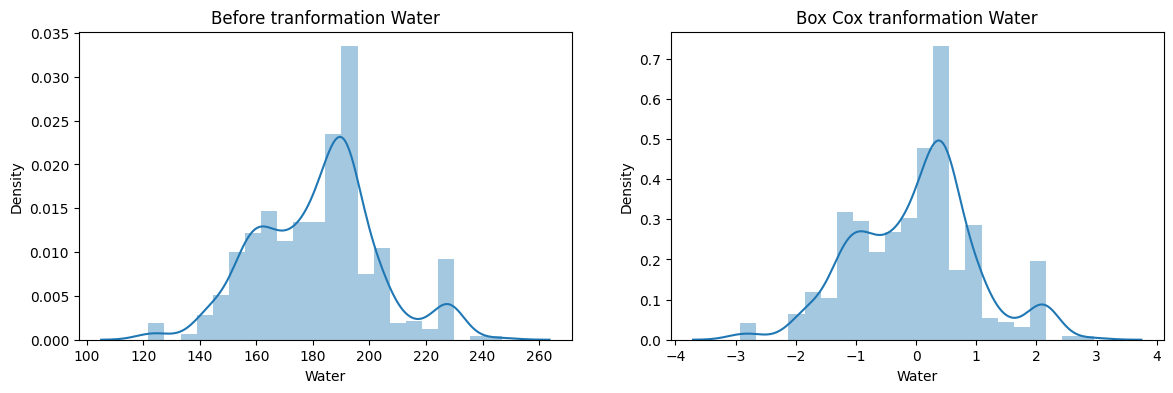

C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


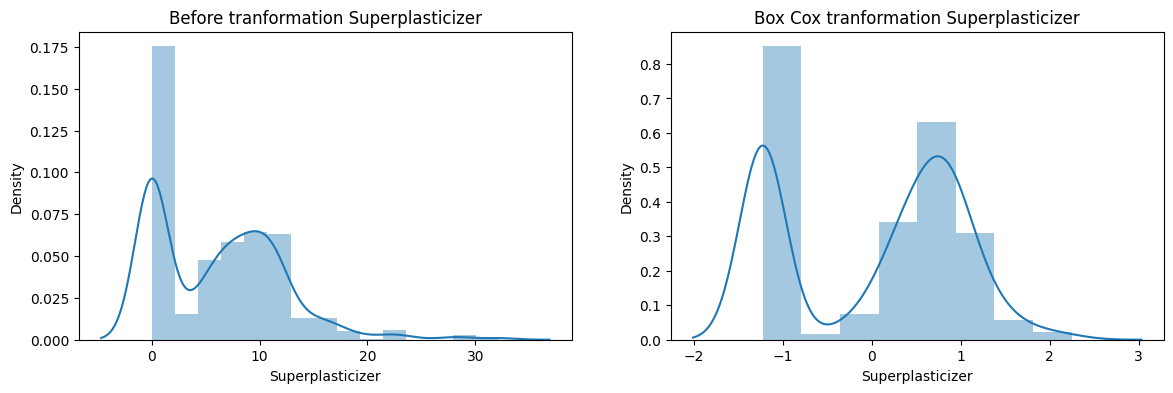

C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


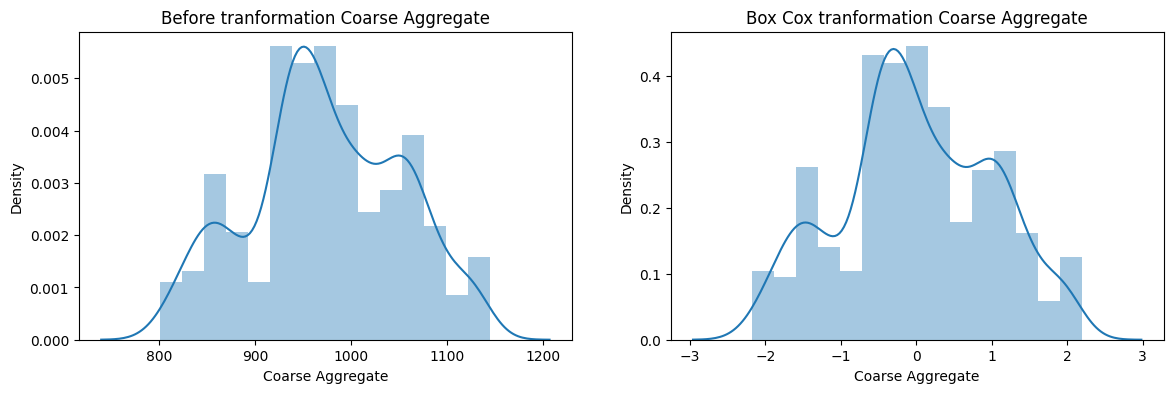

C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


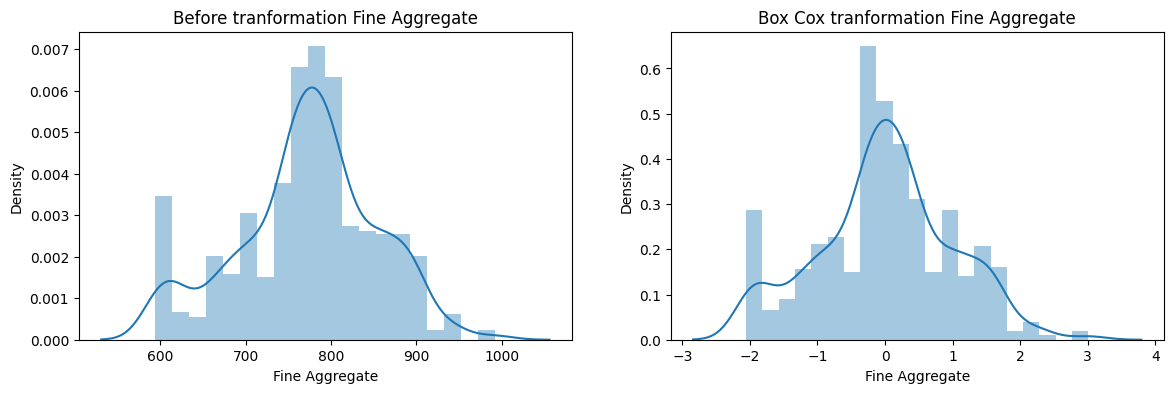

C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\axitk\AppData\Local\Temp\ipykernel_4800\869432933.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


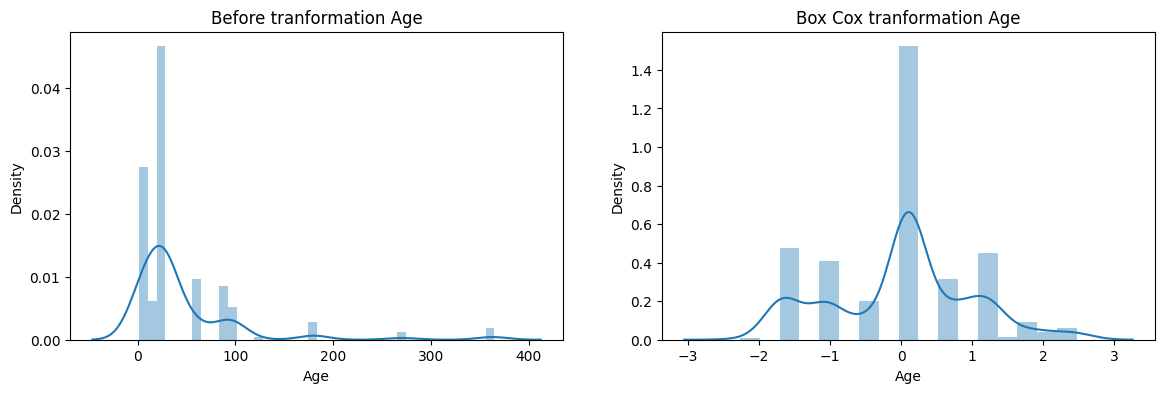

In [50]:
#Plotting the distplot without any transformation

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(f"Before tranformation {col}")
    
    plt.subplot(122)
    sns.distplot(x_train_transformed2[col])
    plt.title(f"Box Cox tranformation {col}")
    
    plt.show()

In [51]:
pd.DataFrame({'cols':x_train.columns,'Box Cox Transformation Lambda':pt.lambdas_,'Yeo tranformation Lamda':pt1.lambdas_})

,cols,Box Cox Transformation Lambda,Yeo tranformation Lamda
0,Cement,0.172271,0.213025
1,Blast Furnace Slag,0.022924,0.020476
2,Fly Ash,-0.028797,-0.038218
3,Water,0.809568,0.958936
4,Superplasticizer,0.087911,0.304951
5,Coarse Aggregate,1.129167,1.192751
6,Fine Aggregate,1.829625,1.975085
7,Age,0.048975,-0.062443
